Optimizer:  SGD
Epoch 0, Loss: 30.783076, Accuracy: 9.3
Epoch 100, Loss: 28.124461, Accuracy: 11.3
Epoch 200, Loss: 26.771874, Accuracy: 13.200000000000001
Epoch 300, Loss: 26.100502, Accuracy: 13.4
Epoch 400, Loss: 25.581309, Accuracy: 14.299999999999999
Epoch 500, Loss: 25.091810, Accuracy: 15.6
Epoch 600, Loss: 24.645738, Accuracy: 16.2
Epoch 700, Loss: 24.183631, Accuracy: 16.900000000000002
Epoch 800, Loss: 23.774646, Accuracy: 16.900000000000002
Epoch 900, Loss: 23.386682, Accuracy: 17.2
Optimizer:  SGD+Momentum
Epoch 0, Loss: 30.091456, Accuracy: 10.6
Epoch 100, Loss: 23.700763, Accuracy: 17.5
Epoch 200, Loss: 21.105654, Accuracy: 23.1
Epoch 300, Loss: 28.442414, Accuracy: 13.8
Epoch 400, Loss: 31.361209, Accuracy: 9.2
Epoch 500, Loss: 31.292131, Accuracy: 9.4
Epoch 600, Loss: 31.119438, Accuracy: 9.9
Epoch 700, Loss: 31.292131, Accuracy: 9.4
Epoch 800, Loss: 31.326670, Accuracy: 9.3
Epoch 900, Loss: 30.497740, Accuracy: 11.700000000000001
Optimizer:  Adam
Epoch 0, Loss: 30.4992

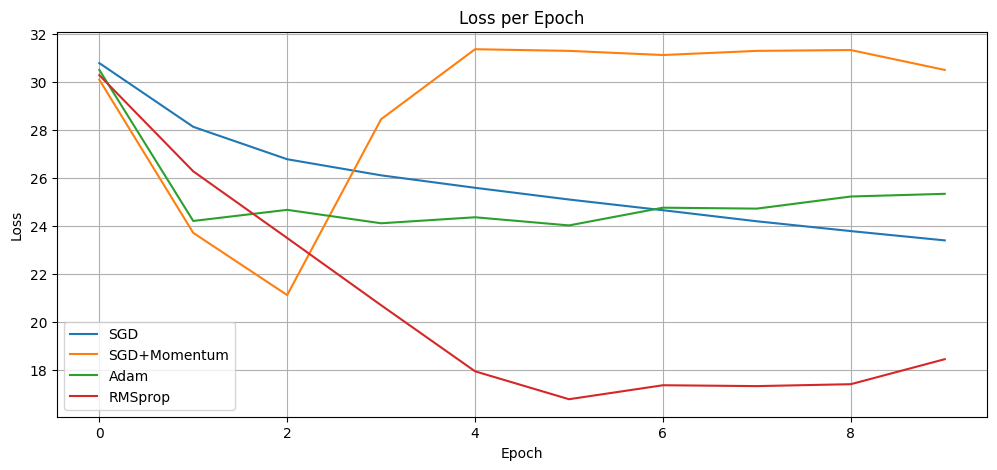

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import DnnLib
import json

#Cargar Entradas
data = np.load("Datasets/mnist_train.npz")
test = np.load("Datasets/mnist_test.npz")

imagesD = data ['images']
labelsD = data ['labels']

imagesD = imagesD[:1000]
labelsD = labelsD[:1000]

DIma = imagesD.reshape(imagesD.shape[0], -1) / 255.0

y = np.zeros((1000, 10), dtype=np.float64)
y[np.arange(1000), labelsD] = 1.0

#inicializar Capas, Pesos y Sesgos
capas = [
    DnnLib.DenseLayer(784, 128, DnnLib.ActivationType.RELU),
    DnnLib.DenseLayer(128, 10, DnnLib.ActivationType.SOFTMAX)
]

#opti = DnnLib.SGD(learning_rate=0.001)
optimizers = [
 ("SGD", DnnLib.SGD(0.001)),
 ("SGD+Momentum", DnnLib.SGD(0.001, 0.9)),
 ("Adam", DnnLib.Adam(0.001)),
 ("RMSprop", DnnLib.RMSprop(0.001))
]

def train_network(layers, optimizer, data, onehot, targets, epochs):
    losses = []
    for epoch in range(epochs):
            h1 = layers[0].forward(data)
            output = layers[1].forward(h1)
            # Cross-entropy loss
            loss = DnnLib.cross_entropy(output, onehot)
        
            #Backward pass
            grad = DnnLib.cross_entropy_gradient(output, onehot)
            grad = layers[1].backward(grad)
            grad = layers[0].backward(grad)
            
            # Update parameters
            for layer in layers:
                optimizer.update(layer)
                
            if epoch % 100 == 0:
                predicted_classes = np.argmax(output, axis=1)
                accuracy = np.mean(predicted_classes == targets)
                print(f"Epoch {epoch}, Loss: {loss:.6f}, Accuracy: {accuracy*100}")
                losses.append(loss)
                
                
                
    return losses

historial = {}
for name, opti in optimizers: 
    capas = [
        DnnLib.DenseLayer(784, 128, DnnLib.ActivationType.RELU),
        DnnLib.DenseLayer(128, 10, DnnLib.ActivationType.SOFTMAX)
    ]
    opti.reset()
    print ("Optimizer: ",name)
    historial[name] = train_network(capas, opti, DIma, y, labelsD, 1000)


#Graficar
plt.figure(figsize=(12, 5))

for name,losses in historial.items():
    plt.plot(losses, label=name)
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
